{"txt2imgreq": {"prompt": "A happy doggo", "steps": 50, "sampler_name": "DDIM"}}


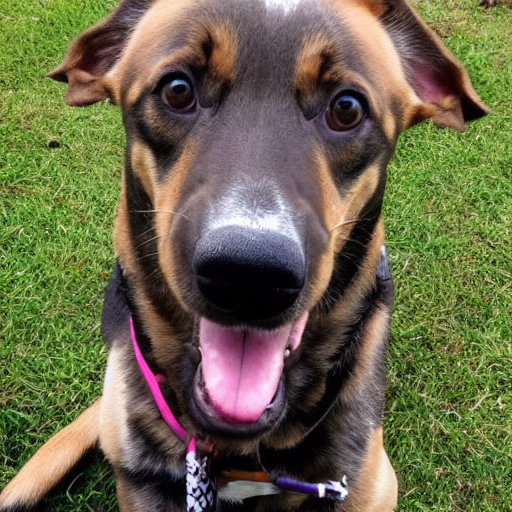

In [74]:
#simple test of text2img

#Uh, change the glados:7860 below to wherever your server is running!

#Hint:  Visit http://(your server):7860/docs to see all the parms available.

#valid sampler names: Euler a, Euler, LMS, Heun, DPM2, DPM2 a, DPM fast, DPM adaptive, DDIM, PLMS

import io
import requests
from PIL import Image
import base64
import IPython.display

payload = {
    "txt2imgreq": 
    {
        "prompt": "A happy doggo",
        
        #optional parms
        "steps": 50,
        "sampler_name": "DDIM"
    }
}

payloadJson = json.dumps( payload)

print(payloadJson)

resp = requests.post(url="http://glados:7860/v1/txt2img", data=payloadJson).json()

#print(resp)

for i in resp['images']:
    img = Image.open(io.BytesIO(base64.b64decode(i)))
    display(img)


In [68]:
#text2img Example using CURL


from IPython.display import Image

!curl -X 'POST' \
  'http://glados:7860/v1/txt2img' \
  -H 'Content-Type: application/json' \
  -d '{"txt2imgreq": {"prompt": "A happy doggo", "steps": 20} }' \
  --output curl_reply.json

#well, we now have the reply (with the image) in the .json file, we'd need to extract the image value and convert it back to png to display it


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  602k  100  602k  100    57   375k     35  0:00:01  0:00:01 --:--:--  375k


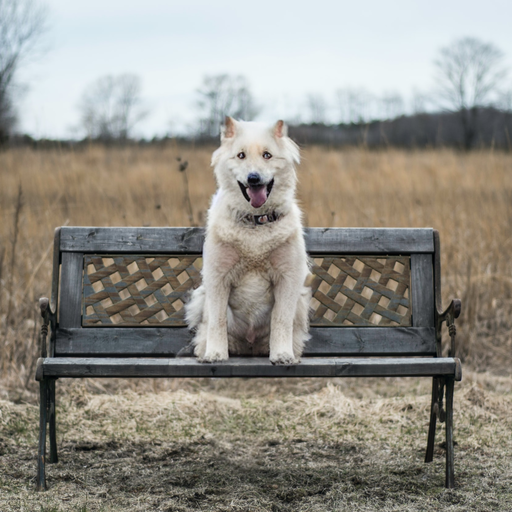

In [81]:
#simple test of img2img

#Hint:  Visit http://(your server):7860/docs to see all the parms available.

#valid inpaint sampler names: Euler a, Euler, LMS, Heun, DPM2, DPM2 a, DDIM, PLMS

import io
import requests
from PIL import Image
import IPython.display
from base64 import b64encode
import json

#grab our two files from disk (a pic, and the b&w mask for it) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

with open("../aitools/mask.png", 'rb') as open_file:
   mask_pic = str(base64.b64encode(open_file.read()).decode('utf-8'))


#there are more parms we can use, but let's use only a few
payload= { "img2imgreq": 
          {
            "prompt": "A happy doggo",
            "image": pic,
            "mask_image": mask_pic,
             
            #optional below here
            "sampler_name": "DDIM",
            "steps": 50,
            "inpainting_fill": "original" #can be: fill, original, latent noise, latent nothing
            #there are more possible options too, too lazy to write them all
          }
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://glados:7860/v1/img2img",data=payloadJson ).json()

#print(resp)

for i in resp['images']:
    img = Image.open(io.BytesIO(base64.b64decode(i)))
    display(img)

In [31]:
#example of interrogator (getting a text description of an image)

import io
import requests
from PIL import Image
import IPython.display
from base64 import b64encode
import json

#grab our two files from disk (a pic, and the b&w mask for it) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

payload= { "interrogatorreq": 
          {
            "image": pic
          }
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://glados:7860/v1/interrogator",data=payloadJson ).json()

print(resp)


{'description': 'a dog sitting on a bench in a field of grass and dry grass with a sky background and a field of tall grass with dry grass and dry grass, by George Lambourn'}


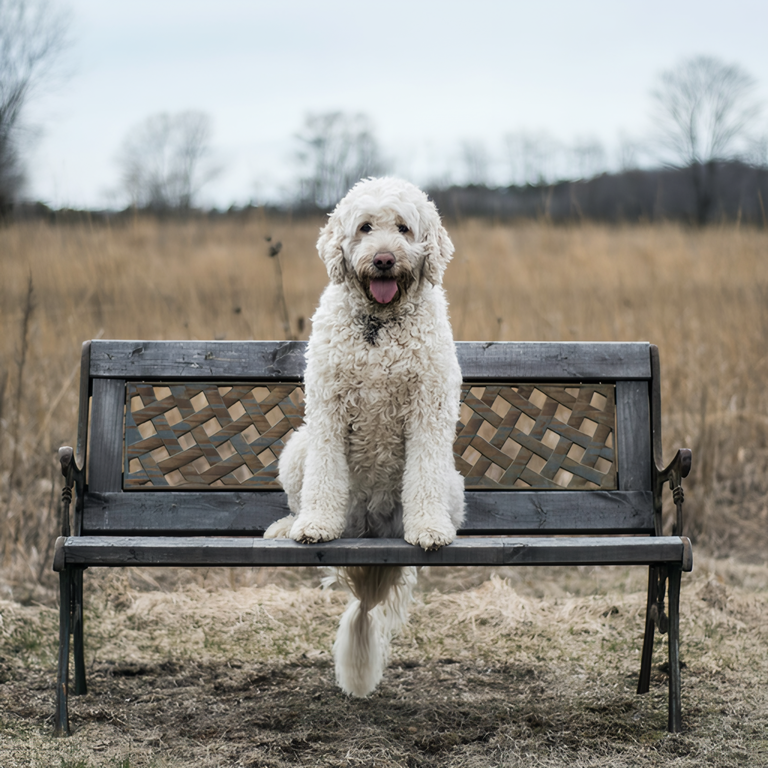

In [67]:
#example of upscaling (exras) (feed in an image, get it back at 2x upscaled or whatever)

import io
import requests
from PIL import Image
import IPython.display
from base64 import b64encode
import json

#grab our two files from disk (a pic, and the b&w mask for it) and convert them to text encoding to put them in the json

with open("../aitools/pic.png", 'rb') as open_file:
   pic = str(base64.b64encode(open_file.read()).decode('utf-8'))

#possible upscaler names to use:  None, Lanczos, LDSR, BSRGAN, ScuNET GAN, cuNET PSNR, SwinIR_4x, ESRGAN_4x

payload= { "extrasreq": 
          {
            "image": pic,

            #optional parms below  
            "upscaling_resize": 1.5,
            "upscaler1_name": "ESRGAN_4x",
            "upscaler2_name": "SwinIR_4x",
            "extras_upscaler_2_visibility:": 0.5,
            "gfpgan_visibility": 0,
            "codeformer_visibility": 0,
            "codeformer_weight": 0, #0 means max I guess
          }
         }

payloadJson = json.dumps( payload)

#print(payloadJson)

resp = requests.post(url="http://glados:7860/v1/extras",data=payloadJson ).json()

#print(resp)

for i in resp['images']:
    img = Image.open(io.BytesIO(base64.b64decode(i)))
    display(img)
